In [3]:
import pygad
import numpy
from numpy.linalg import norm
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

In [14]:
POP_SIZE = 10
POINT_NUM = 2048
BIN_NUM = int(math.log2(POINT_NUM))
GEN_NUM = 500

initial_pop=[]
for i in range(POP_SIZE):
    a=[]
    A = '%.3f'%(random.random()*POINT_NUM)
    B = '%.3f'%(random.random()*POINT_NUM)
    a.append(A)
    a.append(B)
    initial_pop.append(a)

def graph(x, y):
    return -(y+47)*numpy.sin(numpy.sqrt(abs(x/2+(y+47))))-x*numpy.sin(numpy.sqrt(abs(x-(y+47))))


def func(x, y):
    A = -(y+47)*math.sin(math.sqrt(abs(x/2+(y+47))))-x*math.sin(math.sqrt(abs(x-(y+47))))
    return A


def plot_solution(solution):
    X, Y = numpy.meshgrid(numpy.linspace(0, POINT_NUM, 1000), numpy.linspace(0, POINT_NUM, 1000))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection="3d")
    ax.scatter(solution[0], solution[1], func(solution[0], solution[1]), color ='red')
    ax.plot_surface(X, Y, graph(X, Y))
    plt.show()

In [15]:
def crossover_func(parents, offspring_size, ga_instance):
    parents= parents.tolist()

    parents[0][0] =str(parents[0][0])
    parents[0][1] = str(parents[0][1])
    parents[1][0] = str(parents[1][0])
    parents[1][1] = str(parents[1][1])

    offspring = parents[0]

    offspring[1]=(parents[1])[0]
    return offspring


def mutation_func(offspring, ga_instance):
    offspring[0] = str(offspring[0])
    offspring[1] = str(offspring[1])

    DX = (offspring[0]).split('.')
    DY = (offspring[1]).split('.')

    DX[0] = list(map(int, format(int(DX[0]), 'b').zfill(BIN_NUM)))
    DX[1] = list(map(int, format(int(DX[1]), 'b').zfill(BIN_NUM)))
    DY[0] = list(map(int, format(int(DY[0]), 'b').zfill(BIN_NUM)))
    DY[1] = list(map(int, format(int(DY[1]), 'b').zfill(BIN_NUM)))
    i = random.randint(0, BIN_NUM - 1)
    j = random.randint(0, BIN_NUM - 1)
    k = random.randint(0, BIN_NUM - 1)
    l = random.randint(0, BIN_NUM - 1)

    if (DX[0])[i]==0:
        (DX[0])[i] = 1
    else: (DX[0])[i] = 0

    if (DX[1])[j]==0:
        (DX[1])[j] = 1
    else: (DX[1])[j] = 0

    if (DY[0])[k]==0:
        (DY[0])[k] = 1
    else: (DY[0])[k] = 0

    if (DY[1])[k]==0:
        (DY[1])[k] = 1
    else: (DY[1])[k] = 0

    DX[0] = int(''.join(map(str, DX[0])), base = 2)
    DX[1] = int(''.join(map(str, DX[1])), base = 2)
    DY[0] = int(''.join(map(str, DY[0])), base = 2)
    DY[1] = int(''.join(map(str, DY[1])), base = 2)

    DX = str(DX[0]) + '.' + str(DX[1])
    DY = str(DY[0]) + '.' + str(DY[1])
    offspring = []
    offspring.append(DX)
    offspring.append(DY)
    return offspring


def fitness_func(solution, solution_idx):
    X = float(solution[0])
    Y = float(solution[1])
    fitness = func(X, Y)
    return fitness


last_fitness = 0

In [16]:
ga_instance = pygad.GA(num_generations=GEN_NUM,
                       gene_type=float,
                       num_parents_mating=2,
                       sol_per_pop=POP_SIZE,
                       initial_population=initial_pop,
                       fitness_func=fitness_func,
                       mutation_type=mutation_func,
                       mutation_percent_genes=10,
                       mutation_num_genes=1,
                       crossover_type=crossover_func)

In [17]:
ga_instance.run()

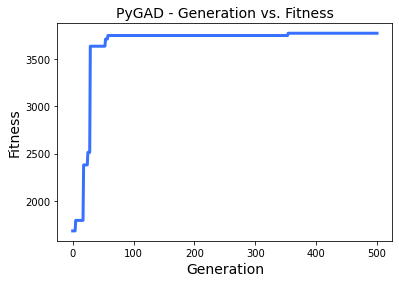

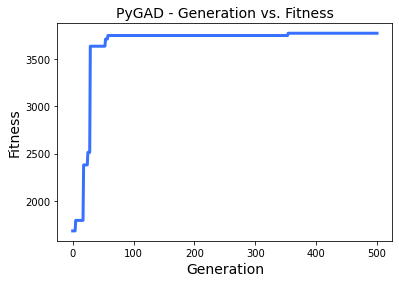

In [18]:
ga_instance.plot_fitness()


Parameters of the best solution : [1791.1858 2046.173 ]
Fitness value of the best solution = 3776.9158080674993
Index of the best solution : 0


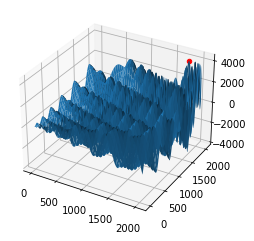

In [19]:
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

plot_solution(solution)